# [Predictive Modeling for Car Insurance Cold Calls]

## 1. Business Understanding

### 1.1 Objective
The goal of this project is to build a predictive model that identifies customers who are likely to purchase car insurance to help business decision makers. In this project, various approaches will be demonstrated, and will select the best model for the project.

### 1.2 Description
This is a dataset from a bank in the United States. Besides usual services, this bank also provides carinsurance services. The bank organizes regular campaigns to attract new clients.The bank has potential customers data, and bank’s employees call them for advertising available car insurance options. We are provided with general information about clients (age, job, etc.) as well as more specific information about the current insurance sell campaign (communication, last contact day) and previous campaigns(attributes like previous attempts, outcome).

## 2. Exploratory Data Analysis

### 2.1 Import Libraries
The data is availabe to us as a CSV file and let's importour R libraries containing the necessary functionality we will need.

In [12]:
library(dplyr)        ## install.packages("dplyr")
library(lubridate)    ## install.packages("lubridate")
library(stringr)      ## install.packages("stringr")
library(ggplot2)      ## install.packages("ggplot2")
library(dummies)      ## install.packages("dummies")
library(caret)        ## install.packages("caret")
library(doParallel)   ## install.packages("doParallel")
library(e1071)        ## install.packages("e1071")
library(class)        ## install.packages("class")
library(MASS)         ## install.packages("MASS")
library(rpart)        ## install.packages("rpart")
library(rpart.plot)   ## install.packages("rpart.plot")
library(randomForest) ## install.packages("randomForest")
library(gbm)          ## install.packages("gbm")
library(C50)          ## install.packages("C50")
library(magick)       ## install.packages("magick")
library(plotly)       ## install.packages("plotly")
library(ggplot2)      ## install.packages("ggplot2")

### 2.2 Load Data
Now that necessary packages are loaded, let's read in and take a peek at the data.

In [13]:
cidata <- read.csv("carInsurance_train.csv", header=T) 

### 2.3 Statistical Summaries and Visualisations

In [14]:
head(cidata)

Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NA,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NA,26,may,5,-1,0,NA,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NA,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NA,14:35:44,14:38:56,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1


In [15]:
summary(cidata)

       Id            Age                 Job          Marital    
 Min.   :   1   Min.   :18.00   management :893   divorced: 483  
 1st Qu.:1001   1st Qu.:32.00   blue-collar:759   married :2304  
 Median :2000   Median :39.00   technician :660   single  :1213  
 Mean   :2000   Mean   :41.21   admin.     :459                  
 3rd Qu.:3000   3rd Qu.:49.00   services   :330                  
 Max.   :4000   Max.   :95.00   (Other)    :880                  
                                NA's       : 19                  
     Education       Default          Balance         HHInsurance    
 primary  : 561   Min.   :0.0000   Min.   :-3058.0   Min.   :0.0000  
 secondary:1988   1st Qu.:0.0000   1st Qu.:  111.0   1st Qu.:0.0000  
 tertiary :1282   Median :0.0000   Median :  551.5   Median :0.0000  
 NA's     : 169   Mean   :0.0145   Mean   : 1532.9   Mean   :0.4928  
                  3rd Qu.:0.0000   3rd Qu.: 1619.0   3rd Qu.:1.0000  
                  Max.   :1.0000   Max.   :98417.0  

In [16]:
str(cidata)

'data.frame':	4000 obs. of  19 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age             : int  32 32 29 25 30 32 37 35 30 30 ...
 $ Job             : Factor w/ 11 levels "admin.","blue-collar",..: 5 2 5 9 5 10 1 5 1 2 ...
 $ Marital         : Factor w/ 3 levels "divorced","married",..: 3 2 3 3 2 3 3 1 2 2 ...
 $ Education       : Factor w/ 3 levels "primary","secondary",..: 3 1 3 1 3 3 3 3 2 2 ...
 $ Default         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Balance         : int  1218 1156 637 373 2694 1625 1000 538 187 3 ...
 $ HHInsurance     : int  1 1 1 1 0 0 1 1 1 1 ...
 $ CarLoan         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Communication   : Factor w/ 2 levels "cellular","telephone": 2 NA 1 1 1 1 1 NA 1 1 ...
 $ LastContactDay  : int  28 26 3 11 3 22 17 12 18 12 ...
 $ LastContactMonth: Factor w/ 12 levels "apr","aug","dec",..: 5 9 7 9 7 9 8 9 10 9 ...
 $ NoOfContacts    : int  2 5 1 2 1 1 1 4 1 2 ...
 $ DaysPassed      : int  -1 -1 119 -1 -1 109 -1 -1 -1 -1 ...
 $ P

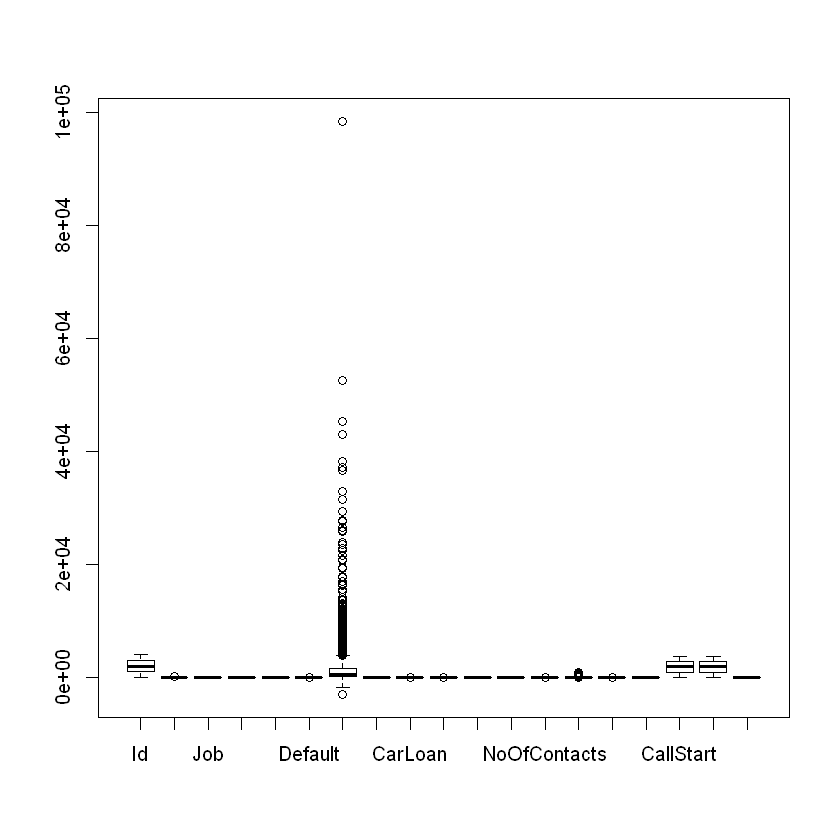

In [17]:
boxplot(cidata)

### 2.4 Variable Description

In [18]:
features <- image_read("Feature Overview.png")
print(features)
####  Variables
#### > Id 
#### > Age (나이)
#### > Job (직업)
#### > Marital (결혼 상태)
#### > Education (교육 수준)
#### > Default (신용 파산)
#### > Balance (연봉)
#### > HHInsurance (가계 보험 여부)
#### > CarLoan (자동차 대출 여부)
#### > Communication (contact 방법, e.g. ‘celluar’, ‘ telephone’, ‘NA’)
#### > LastContactDay (최종 contact day)
#### > LastContactMonth (최종 contact month)
#### > NoOfContacts (현재 진행중인 캠페인 동안 contact한 횟수)
#### > DaysPassed (지난 캠페인 이후 지난 날 수)
#### > PrevAttempts (현재 진행중인 캠페인 이전에 contact한 횟수)
#### > Outcome (지난 캠페인의 outcome, e.g. ‘failure’, ‘other’, ‘success’, ’NA’)
#### > CallStart (최종 통화 시작 시간)
#### > CallEnd (최종 통화 종료 시간)
#### > CarInsurance (자동차 보험 가입 여부)

ERROR: Error in magick_image_readpath(path, density, depth, strip): Magick: UnableToOpenBlob `C:\Users\student\Desktop\Feature Overview.png': No such file or directory @ error/blob.c/OpenBlob/2701


From the table above, we could see 6 categorical attributes, 2 temporal attributes, and 11 numeric attributes. Categorical attributes are are “Job“, “Marital“, “Education“, “Communication“, “LastContactMonth“, and “Outcome“. Temporal attributes are “CallStart“, “CallEnd“, and the rest are numeric attributes.

### 2.5 Age

In [19]:
summary(cidata$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   32.00   39.00   41.21   49.00   95.00 

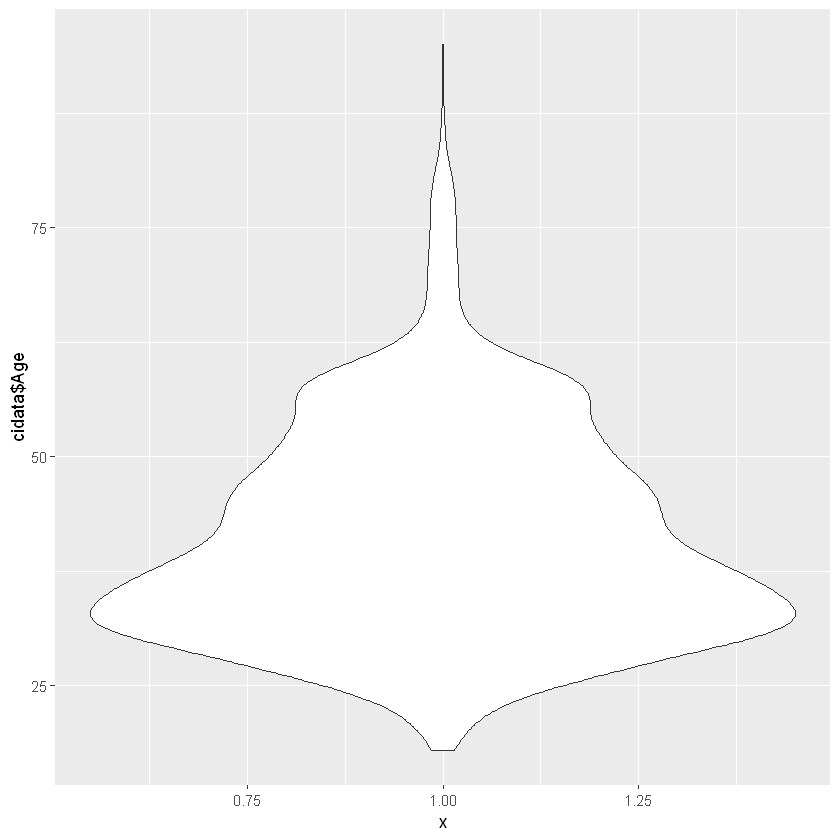

In [20]:
ggplot(cidata, aes(y=cidata$Age, x=1)) + geom_violin()

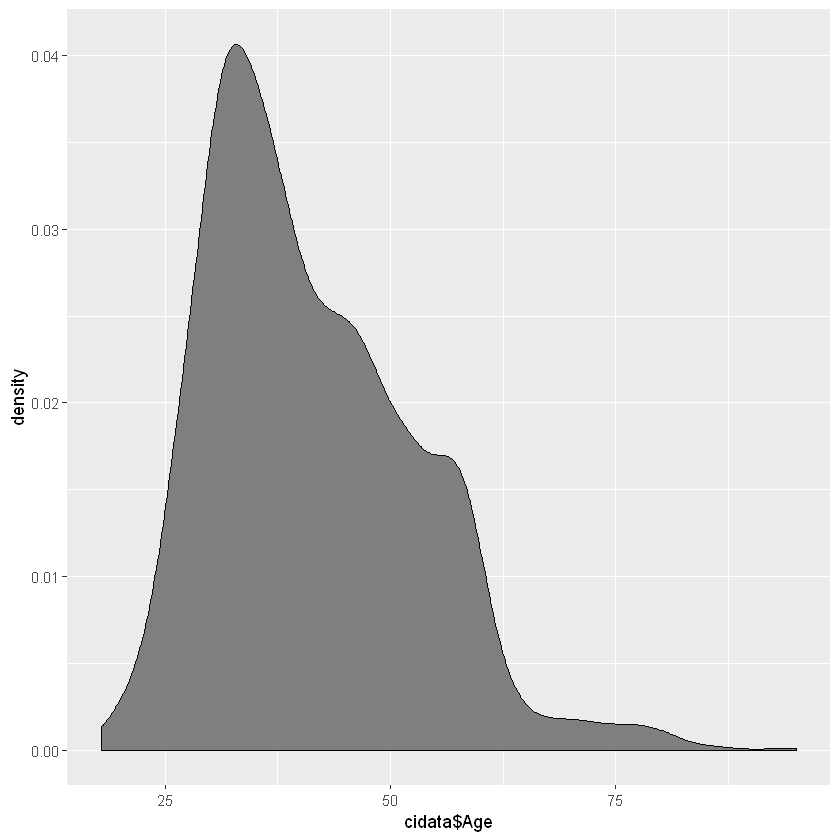

In [21]:
ggplot(data = cidata) + geom_density(aes(x= cidata$Age), fill = "grey50")

We need to convert this Age variable to categorial variable at the next step.

### 2.6 Balance

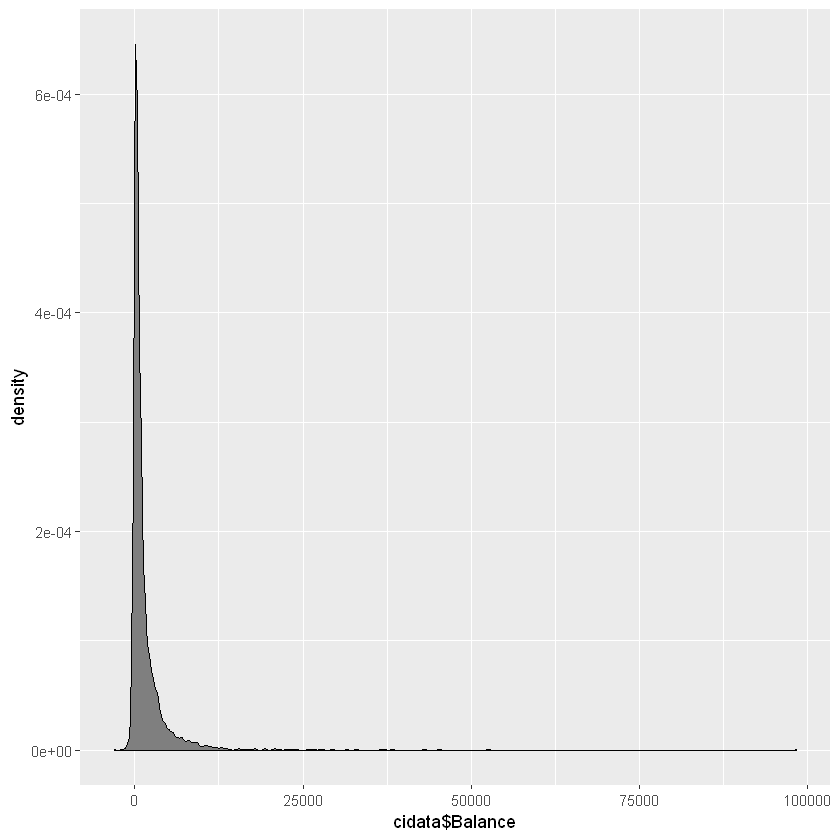

In [22]:
ggplot(data = cidata) + geom_density(aes(x= cidata$Balance), fill = "grey50")

Since we want to use a regression model to predict “CarInsurance” represented by 1 (buy) and 0 (not buy), converting the data into all numeric is necessary. For categorical attributes, we could create dummy variables for them. For temporal attributes, we could take their difference, the length of promo calls, as a numeric variable to predict “CarInsurance“.

Furthermore, it is impossible to explore the data, since most of the are not numeric variables. So, we decided to finish the EDA at this stage..

## 3. Data Preparation - Missing Value Imputation & Feature Engineering

### 3.1 CallStart

As you can see above EDA, both "CallStart" and "CallEnd" variables are string variables.
Let's conver it to numeric for the next step.

In [23]:
starttime <- str_split(string = cidata$CallStart, pattern=":")
head(starttime)

[[1]]
[1] "13" "45" "20"

[[2]]
[1] "14" "49" "03"

[[3]]
[1] "16" "30" "24"

[[4]]
[1] "12" "06" "43"

[[5]]
[1] "14" "35" "44"

[[6]]
[1] "14" "58" "08"

In [24]:
starttime <- data.frame(Reduce(rbind, starttime)) 
head(starttime)

,X1,X2,X3
init,13,45,20
X,14,49,03
X.1,16,30,24
X.2,12,06,43
X.3,14,35,44
X.4,14,58,08


In [25]:
starttime$X1 <- as.numeric(as.character(starttime$X1))

starttime$X2 <- as.numeric(as.character(starttime$X2))

starttime$X3 <- as.numeric(as.character(starttime$X3))

In [26]:
startfactor <- c("starthour", "startminute", "startsecond")

In [27]:
names(starttime) <- startfactor
row.names(starttime) <- NULL
head(starttime)

starthour,startminute,startsecond
13,45,20
14,49,3
16,30,24
12,6,43
14,35,44
14,58,8


### 3.2 CallEnd

Converting the "CallEnd" variables to numeric. It will be same step as we did above.

In [28]:
endtime <- str_split(string = cidata$CallEnd, pattern=":")
endtime <- data.frame(Reduce(rbind, endtime)) 
endtime$X1 <- as.numeric(as.character(endtime$X1))
endtime$X2 <- as.numeric(as.character(endtime$X2))
endtime$X3 <- as.numeric(as.character(endtime$X3))
endfactor <- c("endhour", "endminute", "endsecond")
names(endtime) <- endfactor
row.names(endtime) <- NULL
head(endtime)

endhour,endminute,endsecond
13,46,30
14,52,8
16,36,4
12,20,22
14,38,56
15,11,24


### 3.3 dif

For transforming the temporal variables, “CallStart” and “CallEnd“, I take the difference of them by subtracting  “CallEnd” by “CallStart” to derive the duration of call which might determine a customer decision.
We create derived variable which is named "dif".

In [29]:
dif <- endtime - starttime
head(dif)

endhour,endminute,endsecond
0,1,10
0,3,5
0,6,-20
0,14,-21
0,3,12
1,-47,16


In [30]:
dif <- (dif$endhour * 3600) + (dif$endminute * 60) + (dif$endsecond)
head(dif)
summary(dif)

[1]  70 185 340 819 192 796

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0   126.0   232.0   350.8   460.0  3253.0 

In [31]:
cidata <- cbind(cidata, starttime, endtime)
cidata$dif <- dif
head(cidata)

Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,CallStart,CallEnd,CarInsurance,starthour,startminute,startsecond,endhour,endminute,endsecond,dif
1,32,management,single,tertiary,0,1218,1,0,telephone,...,13:45:20,13:46:30,0,13,45,20,13,46,30,70
2,32,blue-collar,married,primary,0,1156,1,0,NA,...,14:49:03,14:52:08,0,14,49,3,14,52,8,185
3,29,management,single,tertiary,0,637,1,0,cellular,...,16:30:24,16:36:04,1,16,30,24,16,36,4,340
4,25,student,single,primary,0,373,1,0,cellular,...,12:06:43,12:20:22,1,12,6,43,12,20,22,819
5,30,management,married,tertiary,0,2694,0,0,cellular,...,14:35:44,14:38:56,0,14,35,44,14,38,56,192
6,32,technician,single,tertiary,0,1625,0,0,cellular,...,14:58:08,15:11:24,1,14,58,8,15,11,24,796


In [32]:
cidata <- cidata[,-c(17,18)]
head(cidata)

Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,PrevAttempts,Outcome,CarInsurance,starthour,startminute,startsecond,endhour,endminute,endsecond,dif
1,32,management,single,tertiary,0,1218,1,0,telephone,...,0,NA,0,13,45,20,13,46,30,70
2,32,blue-collar,married,primary,0,1156,1,0,NA,...,0,NA,0,14,49,3,14,52,8,185
3,29,management,single,tertiary,0,637,1,0,cellular,...,1,failure,1,16,30,24,16,36,4,340
4,25,student,single,primary,0,373,1,0,cellular,...,0,NA,1,12,6,43,12,20,22,819
5,30,management,married,tertiary,0,2694,0,0,cellular,...,0,NA,0,14,35,44,14,38,56,192
6,32,technician,single,tertiary,0,1625,0,0,cellular,...,1,failure,1,14,58,8,15,11,24,796


### 3.4 Age

Converting "Age" variable to categorical variable. The age ranges are cagetorised based on the "United States Age structure". You can check this out through the web page as follows: https://www.indexmundi.com/united_states/age_structure.html


In [33]:
cidata<- transform(cidata,
                   early_working_age = as.factor(ifelse(cidata$Age<=24, 1, 0)),
                   prime_working_age = as.factor(ifelse(cidata$Age>24 & cidata$Age<=54 , 1, 0)),
                   mature_working_age = as.factor(ifelse(cidata$Age>54 & cidata$Age<=64, 1, 0)),
                   elderly = as.factor(ifelse(cidata$Age>64, 1, 0)))
head(cidata)

Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,startminute,startsecond,endhour,endminute,endsecond,dif,early_working_age,prime_working_age,mature_working_age,elderly
1,32,management,single,tertiary,0,1218,1,0,telephone,...,45,20,13,46,30,70,0,1,0,0
2,32,blue-collar,married,primary,0,1156,1,0,NA,...,49,3,14,52,8,185,0,1,0,0
3,29,management,single,tertiary,0,637,1,0,cellular,...,30,24,16,36,4,340,0,1,0,0
4,25,student,single,primary,0,373,1,0,cellular,...,6,43,12,20,22,819,0,1,0,0
5,30,management,married,tertiary,0,2694,0,0,cellular,...,35,44,14,38,56,192,0,1,0,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,...,58,8,15,11,24,796,0,1,0,0


In [34]:
cidata <- cidata[,-2]
head(cidata)

Id,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,...,startminute,startsecond,endhour,endminute,endsecond,dif,early_working_age,prime_working_age,mature_working_age,elderly
1,management,single,tertiary,0,1218,1,0,telephone,28,...,45,20,13,46,30,70,0,1,0,0
2,blue-collar,married,primary,0,1156,1,0,NA,26,...,49,3,14,52,8,185,0,1,0,0
3,management,single,tertiary,0,637,1,0,cellular,3,...,30,24,16,36,4,340,0,1,0,0
4,student,single,primary,0,373,1,0,cellular,11,...,6,43,12,20,22,819,0,1,0,0
5,management,married,tertiary,0,2694,0,0,cellular,3,...,35,44,14,38,56,192,0,1,0,0
6,technician,single,tertiary,0,1625,0,0,cellular,22,...,58,8,15,11,24,796,0,1,0,0


### 3.5 Job

Dropping missing values

In [35]:
sum(is.na(cidata$Job)) 

[1] 19

There are 19 missing values in "Job" column. We will drop the 19 rows from the dataset.

In [36]:
cidata <- cidata[!c(is.na(cidata$Job)),] # 4000 -> 3981 obs

### 3.6 Education

Filling the missing values with "idk"

In [37]:
sum(is.na(cidata$Education))

[1] 161

In [38]:
cidata$Education_ <- addNA(cidata$Education)
head(cidata$Education)

[1] tertiary primary  tertiary primary  tertiary tertiary
Levels: primary secondary tertiary

In [39]:
levels(cidata$Education_) <- c(levels(cidata$Education), 'idk')
head(cidata$Education)

[1] tertiary primary  tertiary primary  tertiary tertiary
Levels: primary secondary tertiary

In [40]:
cidata$Education <- NULL
cidata

,Id,Job,Marital,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,...,startsecond,endhour,endminute,endsecond,dif,early_working_age,prime_working_age,mature_working_age,elderly,Education_
1,1,management,single,0,1218,1,0,telephone,28,jan,...,20,13,46,30,70,0,1,0,0,tertiary
2,2,blue-collar,married,0,1156,1,0,NA,26,may,...,3,14,52,8,185,0,1,0,0,primary
3,3,management,single,0,637,1,0,cellular,3,jun,...,24,16,36,4,340,0,1,0,0,tertiary
4,4,student,single,0,373,1,0,cellular,11,may,...,43,12,20,22,819,0,1,0,0,primary
5,5,management,married,0,2694,0,0,cellular,3,jun,...,44,14,38,56,192,0,1,0,0,tertiary
6,6,technician,single,0,1625,0,0,cellular,22,may,...,8,15,11,24,796,0,1,0,0,tertiary
7,7,admin.,single,0,1000,1,0,cellular,17,mar,...,2,13,3,17,195,0,1,0,0,tertiary
8,8,management,divorced,0,538,1,0,NA,12,may,...,43,15,40,49,66,0,1,0,0,tertiary
9,9,admin.,married,0,187,1,0,cellular,18,nov,...,56,12,22,42,106,0,1,0,0,secondary
10,10,blue-collar,married,0,3,1,1,cellular,12,may,...,20,9,27,46,326,0,1,0,0,secondary


### 3.7 DaysPassed

Based on the practical cases, we decided to consider the values that over 365 days passed from the first contact day as 365. And the value "-1" will be considered as 365 as well.

In [41]:
summary(cidata$DaysPassed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00   -1.00   -1.00   48.62   -1.00  854.00 

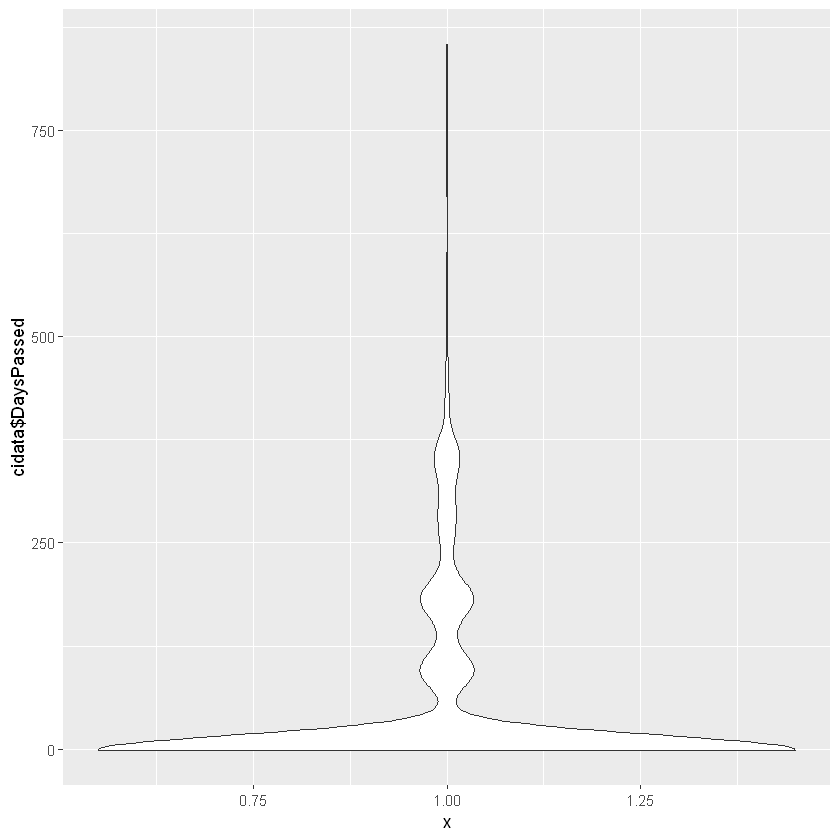

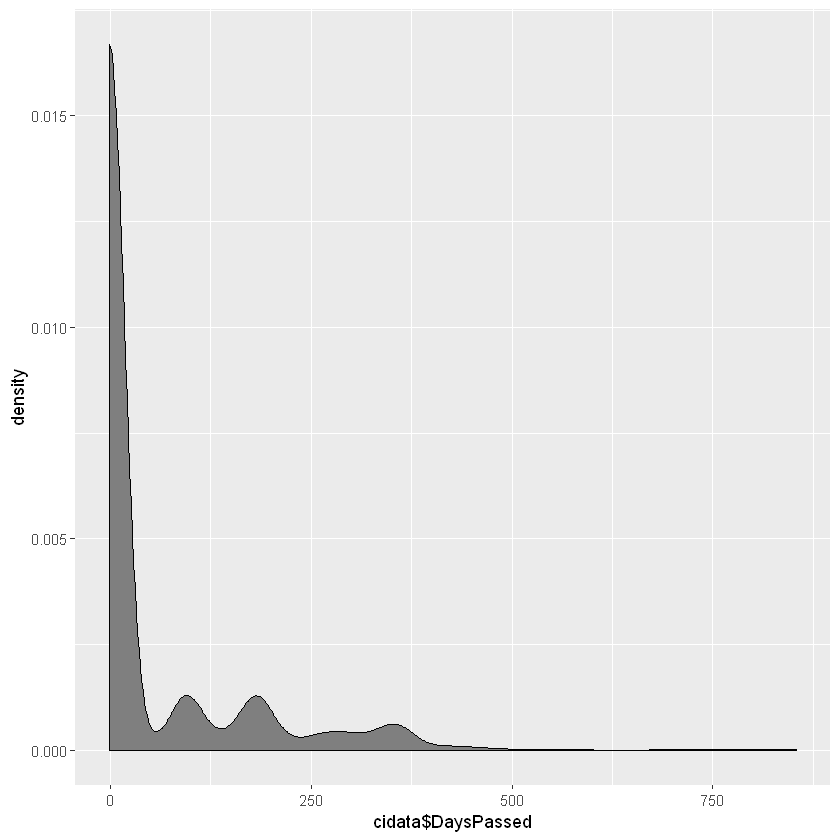

In [42]:
ggplot(cidata, aes(y=cidata$DaysPassed, x=1)) + geom_violin()
ggplot(data = cidata) + geom_density(aes(x= cidata$DaysPassed), fill = "grey50")

In [43]:
cidata$DaysPassed[c(cidata$DaysPassed > 365)] <- 365
cidata$DaysPassed[c(cidata$DaysPassed == -1)] <- 365

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   365.0   365.0   325.3   365.0   365.0 

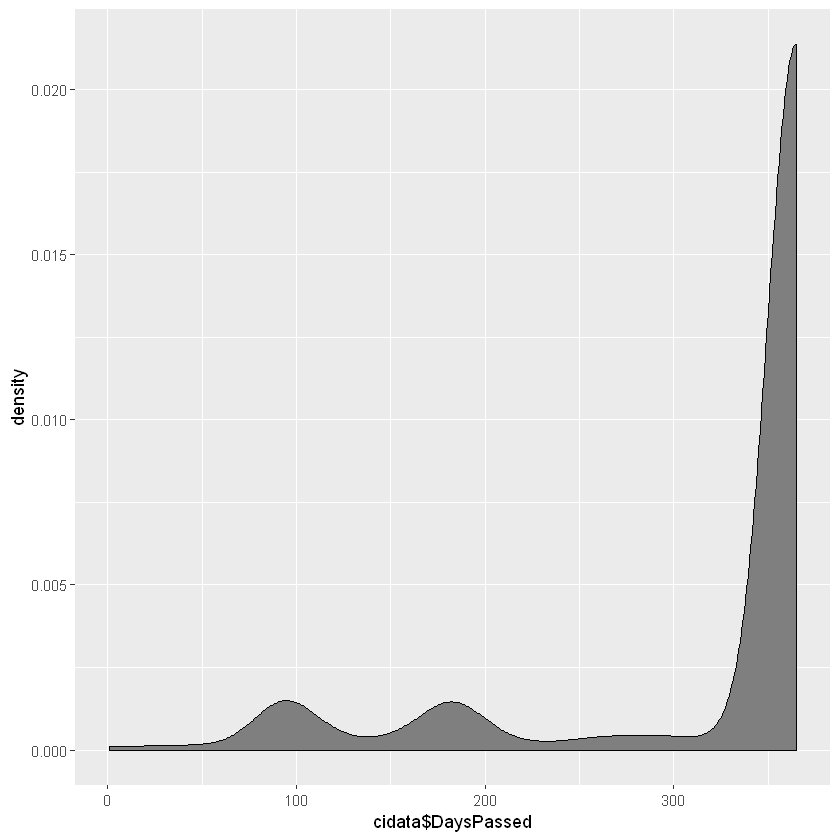

In [44]:
summary(cidata$DaysPassed)
ggplot(data = cidata) + geom_density(aes(x= cidata$DaysPassed), fill = "grey50")

### 3.8 Defalut, CarLoan, CarInsurance, HHInsurance
Converting the binary variables to factor variables

In [45]:
summary(cidata$Default)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.01457 0.00000 1.00000 

In [46]:
cidata$Default <- as.factor(cidata$Default)
cidata$CarLoan <- as.factor(cidata$CarLoan)
cidata$CarInsurance <- as.factor(cidata$CarInsurance)
cidata$HHInsurance <- as.factor(cidata$HHInsurance)

### 3.9 LastContactDay, LastContactMonth

The values of these sections are not tally with the values of the DayPassed. We decided to drop this columns and will use the DayPassed only.

In [47]:
cidata$LastContactDay <- NULL
cidata$LastContactMonth <- NULL

### 3.10 Communication

There are missing values on the communication column. the "NA" will be changed to "Missing"

In [48]:
cidata$Communication_ <- addNA(cidata$Communication)
levels(cidata$Communication_) <- c(levels(cidata$Communication), 'Missing')

cidata$Communication <- NULL

### 3.11 startminute, startsecond, endminute, endsecond\
Delete the data that we don't need to use.

In [49]:
cidata$startminute <- NULL
cidata$startsecond <- NULL
cidata$endminute <- NULL
cidata$endsecond <- NULL

### 3.12 starthour, endhour
Convert the variables to factor

In [50]:
cidata$starthour <- as.factor(cidata$starthour)
cidata$endhour <- as.factor(cidata$endhour)

### 3.13 Outcome
There are missing values on the communication column. the "NA" will be changed to "Missing"

In [51]:
cidata$Outcome_ <- addNA(cidata$Outcome)
levels(cidata$Outcome_) <- c(levels(cidata$Outcome), 'Missing')

cidata$Outcome <- NULL

### 3.14 Balance

As you can see from the density chart below, the values are biased. There are even negative values. Let's create a "minusBalance" variable and put the negative balance and zero balance as "1". And the others as "0.
If the Balance is 1 or less than 1, change it to 1.
At last, take log.

minusBalance 데이터 추가: Balance가 0 및 음수인 경우 1, 아닌경우 0
Balance <= 1인경우 1로 초기화 후 Log변환하여 값을 모음

In [52]:
summary(cidata$Balance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -3058     111     549    1535    1618   98417 

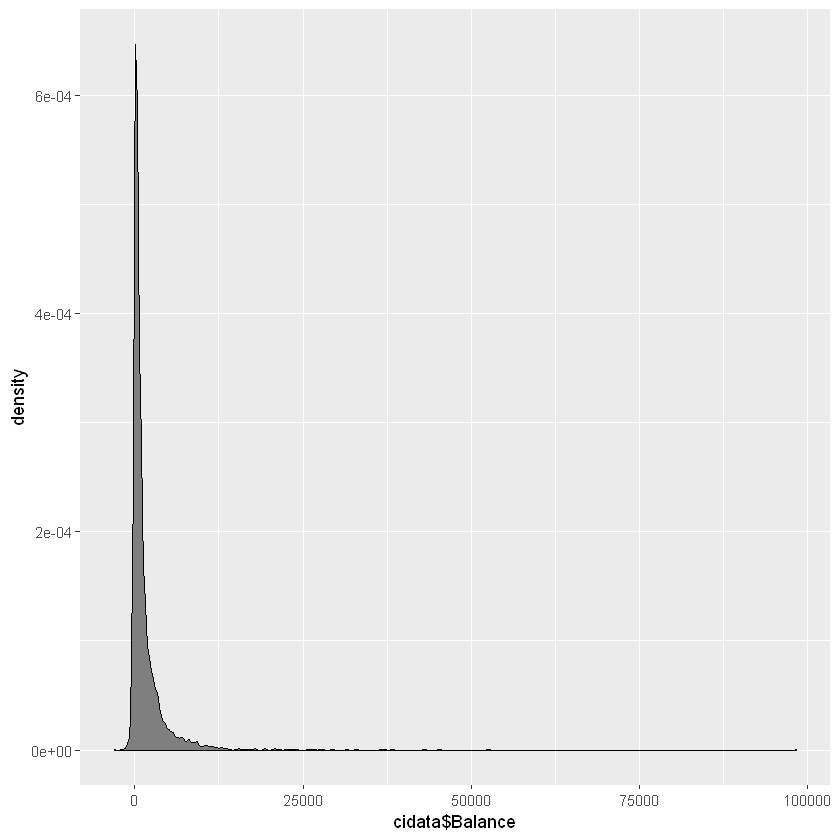

In [53]:
ggplot(data = cidata) + geom_density(aes(x= cidata$Balance), fill = "grey50")

In [54]:
cidata<- transform(cidata,
                   minusbalance = as.factor(ifelse(cidata$Balance<=1, 1, 0)))
                

In [55]:
cidata$logBalance <- cidata$Balance   
cidata$logBalance[c(cidata$Balance <= 1)] <- 1
summary(cidata$logBalance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     111     549    1553    1618   98417 

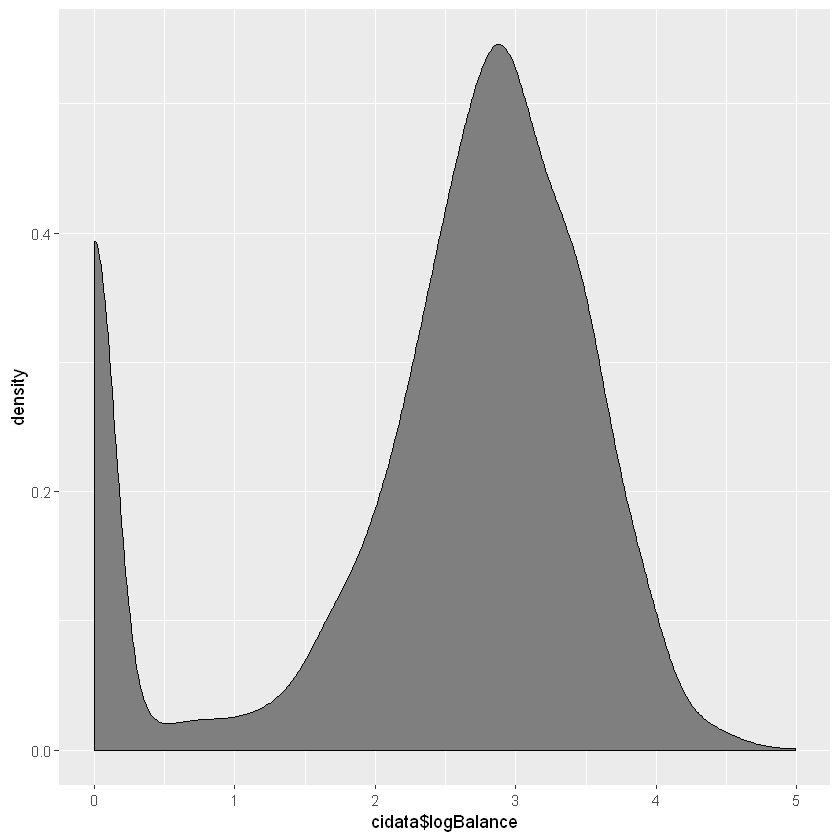

In [56]:
cidata$logBalance <- log10(cidata$logBalance)
ggplot(data = cidata) + geom_density(aes(x= cidata$logBalance), fill = "grey50")
cidata$Balance <- NULL

### 3.15 Dummy Variables

Lastly, we have to create dummy variables for the logistic regression model since all regression models are not resistant to categorical variables.

In [57]:
startdummy <- predict(dummyVars(~starthour, data = cidata), newdata = cidata)
startdummy <- as.data.frame(startdummy)

enddummy <- predict(dummyVars(~endhour, data = cidata), newdata = cidata)
enddummy <- as.data.frame(enddummy)

jobdummy <- predict(dummyVars(~Job, data = cidata), newdata = cidata)
jobdummy <- as.data.frame(jobdummy)

maritaldummy <- predict(dummyVars(~Marital, data = cidata), newdata = cidata)
maritaldummy <- as.data.frame(maritaldummy)

edudummy <- predict(dummyVars(~Education_, data = cidata), newdata = cidata)
edudummy <- as.data.frame(edudummy)

OCdummy <- predict(dummyVars(~Outcome_, data = cidata), newdata = cidata)
OCdummy <- as.data.frame(OCdummy)

CCdummy <- predict(dummyVars(~Communication_, data = cidata), newdata = cidata)
CCdummy <- as.data.frame(CCdummy)

cidata <- cbind(cidata,startdummy,enddummy,jobdummy,maritaldummy,edudummy,OCdummy,CCdummy)

cidata$Id <- NULL
cidata$Job <- NULL
cidata$Marital <- NULL
cidata$starthour <- NULL
cidata$endhour <- NULL
cidata$Education_ <- NULL
cidata$Communication_ <- NULL
cidata$Outcome_ <- NULL

summary(cidata)

 Default  HHInsurance CarLoan   NoOfContacts      DaysPassed   
 0:3923   0:2012      0:3450   Min.   : 1.000   Min.   :  1.0  
 1:  58   1:1969      1: 531   1st Qu.: 1.000   1st Qu.:365.0  
                               Median : 2.000   Median :365.0  
                               Mean   : 2.609   Mean   :325.3  
                               3rd Qu.: 3.000   3rd Qu.:365.0  
                               Max.   :43.000   Max.   :365.0  
  PrevAttempts     CarInsurance      dif         early_working_age
 Min.   : 0.0000   0:2386       Min.   :   5.0   0:3874           
 1st Qu.: 0.0000   1:1595       1st Qu.: 126.0   1: 107           
 Median : 0.0000                Median : 231.0                    
 Mean   : 0.7174                Mean   : 350.9                    
 3rd Qu.: 0.0000                3rd Qu.: 460.0                    
 Max.   :58.0000                Max.   :3253.0                    
 prime_working_age mature_working_age elderly  minusbalance   logBalance   
 0: 688

In [58]:
cluster <- makeCluster(8)
registerDoParallel(cluster)
foreach::getDoParWorkers()

[1] 8

### 3.16 Split data into training and test set

In [59]:
cidata_success <- cidata[cidata$CarInsurance ==0,]
cidata_fail <- cidata[cidata$CarInsurance ==1,]

set.seed(0105)
sample_success <- sample(1:nrow(cidata_success), nrow(cidata_success)*0.75)
set.seed(0105)
sample_fail <- sample(1:nrow(cidata_fail), nrow(cidata_fail)*0.75)

cidata_train <- rbind(cidata_fail[sample_fail,], cidata_success[sample_success,])  # 2386 obs
cidata_test  <- rbind(cidata_fail[-sample_fail,], cidata_success[-sample_success,])#  996 obs

## 4. Modeling

### 4.1 Model Selection

#### 4.1.1 Naïve Bayes Classifier
Let's start with Naive Bayes Classifier.

In [60]:
cidata_naive <- naiveBayes(CarInsurance~., data = cidata_train)
cidata_naive


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      0       1 
0.59933 0.40067 

Conditional probabilities:
   Default
Y             0           1
  0 0.979877026 0.020122974
  1 0.990802676 0.009197324

   HHInsurance
Y           0         1
  0 0.4197876 0.5802124
  1 0.6379599 0.3620401

   CarLoan
Y            0          1
  0 0.84125210 0.15874790
  1 0.90050167 0.09949833

   NoOfContacts
Y       [,1]     [,2]
  0 2.882057 3.566413
  1 2.200669 2.156209

   DaysPassed
Y       [,1]     [,2]
  0 341.0263  67.7145
  1 301.2717 105.5062

   PrevAttempts
Y        [,1]     [,2]
  0 0.4745668 1.583982
  1 1.0852843 2.692513

   dif
Y       [,1]     [,2]
  0 216.9195 205.5256
  1 545.6681 403.1870

   early_working_age
Y            0          1
  0 0.98155394 0.01844606
  1 0.95652174 0.04347826

   prime_working_age
Y           0         1
  0 0.1347121 0.8652879
  1 0.2290970 0.7709030

   mature_wo

In [61]:
pred_cidata_naive_tr <- predict(cidata_naive, newdata = cidata_train)
cidata_naive_tr_CM <- table(actual = cidata_train$CarInsurance, predicted = pred_cidata_naive_tr)
cidata_naive_tr_CM

      predicted
actual    0    1
     0 1488  301
     1  518  678

In [62]:
naive_tr_acc <- (cidata_naive_tr_CM[1,1] + cidata_naive_tr_CM[2,2])/length(cidata_train$CarInsurance)
naive_tr_acc
# Train Accuracy: 72.6 %

[1] 0.7256281

In [63]:
pred_cidata_naive_te <- predict(cidata_naive, newdata = cidata_test)
cidata_naive_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_naive_te)
cidata_naive_te_CM

      predicted
actual   0   1
     0 506  91
     1 147 252

In [64]:
naive_te_acc <- (cidata_naive_te_CM[1,1] + cidata_naive_te_CM[2,2])/length(cidata_test$CarInsurance)
naive_te_acc
# Test Accuracy: 76.1 %

[1] 0.7610442

In [65]:
result_naive <- as.data.frame(cbind(naive_tr_acc, naive_te_acc))
colnames(result_naive) <- c("tr_acc", "te_acc")
rownames(result_naive) <- c("Naïve Bayes")

#### 4.1.2 KNN

In [66]:
set.seed(0105)
tuning_knn <- tune.knn(x=cidata_train[,-7], y=cidata_train$CarInsurance, k=seq(3,19,by=2))
tuning_knn


Parameter tuning of 'knn.wrapper':

- sampling method: 10-fold cross validation 

- best parameters:
 k
 9

- best performance: 0.2177516 


In [67]:
set.seed(0105)
trControl <- trainControl(method  = "cv",
                          number  = 10)
trControl

$method
[1] "cv"

$number
[1] 10

$repeats
[1] NA

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x000000002fc31d10>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

In [68]:
set.seed(0105)
cidata_knn <- train(x=cidata_train[,-7], y=cidata_train[,7],
                 method     = "knn",
                 tuneGrid   = expand.grid(k = 7:13),
                 trControl  = trControl,
                 metric     = "Accuracy",
                 preProcess = c("center", "scale")
                 )

KNN_tr_acc <- max(cidata_knn$results$Accuracy)
KNN_tr_acc
# Train Accuracy: 70.4%, k=11

[1] 0.7041754

In [69]:
pred_cidata_KNN_te <- predict(cidata_knn, newdata = cidata_test)
cidata_KNN_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_naive_te)
cidata_KNN_te_CM

      predicted
actual   0   1
     0 506  91
     1 147 252

In [70]:
KNN_te_acc <- (cidata_KNN_te_CM[1,1] + cidata_KNN_te_CM[2,2])/length(cidata_test$CarInsurance)
KNN_te_acc
# Test Accuracy: 76.1%

[1] 0.7610442

In [71]:
result_KNN <- as.data.frame(cbind(KNN_tr_acc, KNN_te_acc))
colnames(result_KNN) <- c("tr_acc", "te_acc")
rownames(result_KNN) <- c("K(11)-NN")

#### 4.1.3 LDA

In [72]:
cidata_LDA <- lda(CarInsurance~., data=cidata_train, cv=TRUE)
cidata_LDA

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

Call:
lda(CarInsurance ~ ., data = cidata_train, cv = TRUE)

Prior probabilities of groups:
      0       1 
0.59933 0.40067 

Group means:
     Default1 HHInsurance1   CarLoan1 NoOfContacts DaysPassed PrevAttempts
0 0.020122974    0.5802124 0.15874790     2.882057   341.0263    0.4745668
1 0.009197324    0.3620401 0.09949833     2.200669   301.2717    1.0852843
       dif early_working_age1 prime_working_age1 mature_working_age1   elderly1
0 216.9195         0.01844606          0.8652879           0.1056456 0.01062046
1 545.6681         0.04347826          0.7709030           0.1321070 0.05351171
  minusbalance1 logBalance starthour.9 starthour.10 starthour.11 starthour.12
0     0.1771940   2.291567   0.1050866   0.11403018   0.09502515    0.1134712
1     0.1053512   2.574287   0.1237458   0.09866221   0.09280936    0.1145485
  starthour.13 starthour.14 starthour.15 starthour.16 starthour.17 endhour.9
0    0.1252096   0.12185579    0.1129122    0.1006149    0.1117943 0.0961431
1    0.

In [73]:
pred_cidata_LDA_tr <- predict(cidata_LDA, newdata = cidata_train)
cidata_LDA_tr_CM <- table(actual = cidata_train$CarInsurance, predicted = pred_cidata_LDA_tr$class)
cidata_LDA_tr_CM

      predicted
actual    0    1
     0 1619  170
     1  409  787

In [74]:
LDA_tr_acc <- (cidata_LDA_tr_CM[1,1] + cidata_LDA_tr_CM[2,2])/length(cidata_train$CarInsurance)
LDA_tr_acc 
# Train Accuracy: 80.6%

[1] 0.8060302

In [75]:
pred_cidata_LDA_te <- predict(cidata_LDA, newdata = cidata_test)
cidata_LDA_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_LDA_te$class)
cidata_LDA_te_CM

      predicted
actual   0   1
     0 541  56
     1 126 273

In [76]:
LDA_te_acc <- (cidata_LDA_te_CM[1,1] + cidata_LDA_te_CM[2,2])/length(cidata_test$CarInsurance)
LDA_te_acc
# Test Accuracy: 81.7%

[1] 0.8172691

In [77]:
result_LDA <- as.data.frame(cbind(LDA_tr_acc, LDA_te_acc))
colnames(result_LDA) <- c("tr_acc", "te_acc")
rownames(result_LDA) <- c("LDA")

#### 4.1.4 Logistic Regression

In [78]:
cidata_logit <- glm(CarInsurance~., data=cidata_train, family="binomial")
summary(cidata_logit)


Call:
glm(formula = CarInsurance ~ ., family = "binomial", data = cidata_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3998  -0.6006  -0.2796   0.5629   2.7391  

Coefficients: (8 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.1968701  0.9007313  -1.329 0.183922    
Default1                 -0.1832102  0.4735848  -0.387 0.698861    
HHInsurance1             -0.8797549  0.1126868  -7.807 5.85e-15 ***
CarLoan1                 -0.5945477  0.1672453  -3.555 0.000378 ***
NoOfContacts             -0.1028151  0.0243897  -4.216 2.49e-05 ***
DaysPassed               -0.0004492  0.0010241  -0.439 0.660910    
PrevAttempts              0.0386185  0.0286819   1.346 0.178161    
dif                       0.0054959  0.0002459  22.354  < 2e-16 ***
early_working_age1       -0.5651926  0.5258620  -1.075 0.282468    
prime_working_age1       -1.4988179  0.4016579  -3.732 0.000190 ***
m

In [79]:
pred_cidata_logit_tr <- predict(cidata_logit, newdata = cidata_train, type="response")
pred_cidata_logit_tr <- ifelse(pred_cidata_logit_tr>0.5, 1, 0) ## Threshold = 0.5
cidata_logit_tr_CM <- table(actual = cidata_train$CarInsurance, predict=pred_cidata_logit_tr)
cidata_logit_tr_CM

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

      predict
actual    0    1
     0 1580  209
     1  328  868

In [80]:
Logistic_tr_acc <- (cidata_logit_tr_CM[1,1] + cidata_logit_tr_CM[2,2])/length(cidata_train$CarInsurance)
Logistic_tr_acc
# Train Accuracy:  82.0%

[1] 0.8201005

In [81]:
pred_cidata_logit_te <- predict(cidata_logit, newdata = cidata_test, type="response")
pred_cidata_logit_te <- ifelse(pred_cidata_logit_te>0.5, 1, 0) ## Threshold = 0.5
cidata_logit_te_CM <- table(actual = cidata_test$CarInsurance, predict=pred_cidata_logit_te)
cidata_logit_te_CM

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

      predict
actual   0   1
     0 527  70
     1 108 291

In [82]:
Logistic_te_acc <- (cidata_logit_te_CM[1,1] + cidata_logit_te_CM[2,2])/length(cidata_test$CarInsurance)
Logistic_te_acc
# Test Accuracy: 82.1%

[1] 0.8212851

In [83]:
result_Logit <- as.data.frame(cbind(Logistic_tr_acc, Logistic_te_acc))
colnames(result_Logit) <- c("tr_acc", "te_acc")
rownames(result_Logit) <- c("Logistic")

#### 4.1.5 Decision Tree (rpart)

In [84]:
cidata_rpart <- rpart(CarInsurance~.,data = cidata_train, control=list(minsplit=15, minbucket=5))
cidata_rpart

n= 2985 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2985 1196 0 (0.5993300 0.4006700)  
   2) dif< 339.5 1947  464 0 (0.7616846 0.2383154)  
     4) Outcome_.success< 0.5 1785  327 0 (0.8168067 0.1831933) *
     5) Outcome_.success>=0.5 162   25 1 (0.1543210 0.8456790) *
   3) dif>=339.5 1038  306 1 (0.2947977 0.7052023)  
     6) dif< 611.5 569  235 1 (0.4130053 0.5869947)  
      12) Communication_.Missing>=0.5 87   24 0 (0.7241379 0.2758621) *
      13) Communication_.Missing< 0.5 482  172 1 (0.3568465 0.6431535) *
     7) dif>=611.5 469   71 1 (0.1513859 0.8486141) *

In [85]:
pred_cidata_rpart_tr<- predict(cidata_rpart, type="class")
cidata_rpart_tr_CM <- table(actual = cidata_train$CarInsurance, predict=pred_cidata_rpart_tr)
cidata_rpart_tr_CM

      predict
actual    0    1
     0 1521  268
     1  351  845

[1] 0.7926298

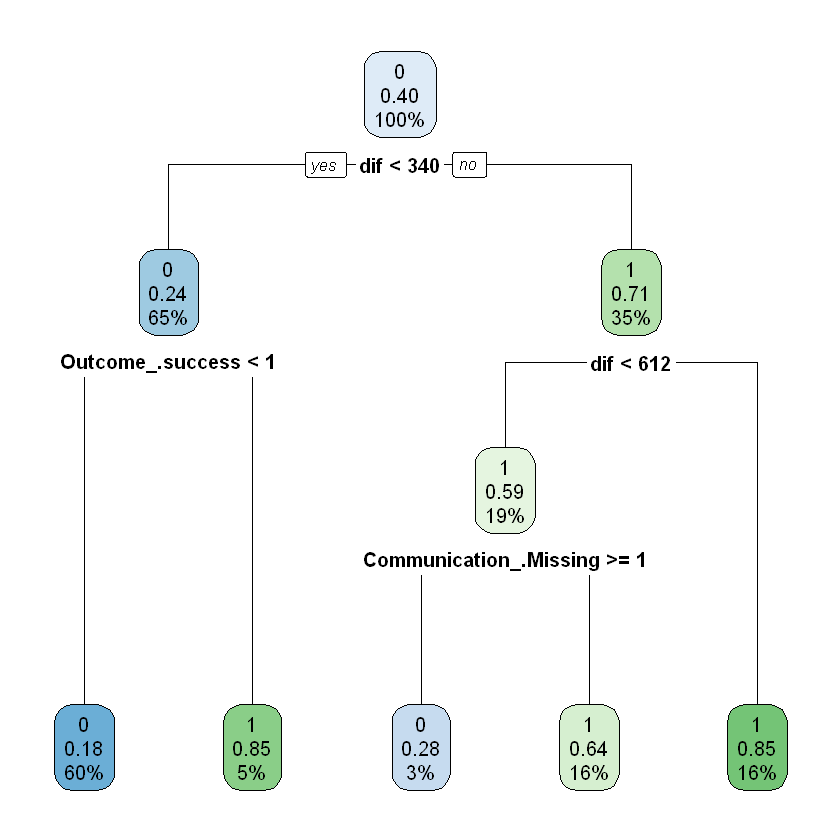

In [86]:
rpart_tr_acc <- (cidata_rpart_tr_CM[1,1] + cidata_rpart_tr_CM[2,2])/length(cidata_train$CarInsurance)
rpart.plot(cidata_rpart)
rpart_tr_acc
# Train Accuracy: 79.3%

In [87]:
pred_cidata_rpart_te <- predict(cidata_rpart, newdata = cidata_test, type="class")
cidata_rpart_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_rpart_te)
cidata_rpart_te_CM

      predicted
actual   0   1
     0 518  79
     1 114 285

In [88]:
rpart_te_acc <- (cidata_rpart_te_CM[1,1] + cidata_rpart_te_CM[2,2])/length(cidata_test$CarInsurance)
rpart_te_acc
# Test Accuracy: 80.6%

[1] 0.8062249

In [89]:
result_rpart <- as.data.frame(cbind(rpart_tr_acc, rpart_te_acc))
colnames(result_rpart) <- c("tr_acc", "te_acc")
rownames(result_rpart) <- c("rpart")

#### 4.1.6 C5.0 Tree

In [90]:
cidata_C5.0_fit <- C5.0(CarInsurance~., data=cidata_train, control = C5.0Control(minCases=10))
summary(cidata_C5.0_fit)


Call:
C5.0.formula(formula = CarInsurance ~ ., data = cidata_train, control
 = C5.0Control(minCases = 10))


C5.0 [Release 2.07 GPL Edition]  	Wed Jan 09 19:39:24 2019
-------------------------------

Class specified by attribute `outcome'

Read 2985 cases (58 attributes) from undefined.data

Decision tree:

Outcome_.success > 0: 1 (250/29)
Outcome_.success <= 0:
:...dif <= 322:
    :...Communication_.Missing > 0: 0 (449/9)
    :   Communication_.Missing <= 0:
    :   :...dif <= 129: 0 (551/39)
    :       dif > 129:
    :       :...CarLoan = 1: 0 (93/9)
    :           CarLoan = 0:
    :           :...HHInsurance = 1: 0 (257/54)
    :               HHInsurance = 0:
    :               :...minusbalance = 1: 0 (42/8)
    :                   minusbalance = 0:
    :                   :...NoOfContacts <= 3: 1 (296/123)
    :                       NoOfContacts > 3: 0 (49/15)
    dif > 322:
    :...dif > 611: 1 (446/71)
        dif <= 611:
        :...Communication_.Missing > 0:
           

In [91]:
pred_cidata_C5.0_tr<- predict(cidata_C5.0_fit, newdata = cidata_train, type="class")
cidata_C5.0_tr_CM <- table(actual = cidata_train$CarInsurance, predict=pred_cidata_C5.0_tr)
cidata_C5.0_tr_CM

      predict
actual    0    1
     0 1461  328
     1  205  991

In [92]:
C50_tr_acc <- (cidata_C5.0_tr_CM[1,1] + cidata_C5.0_tr_CM[2,2])/length(cidata_train$CarInsurance)
C50_tr_acc
# Train Accuracy: 82.1%

[1] 0.8214405

In [93]:
pred_cidata_C5.0_te<- predict(cidata_C5.0_fit, newdata = cidata_test, type="class")
cidata_C5.0_te_CM <- table(actual = cidata_test$CarInsurance, predict=pred_cidata_C5.0_te)
cidata_C5.0_te_CM

      predict
actual   0   1
     0 484 113
     1  72 327

In [94]:
C50_te_acc <- (cidata_C5.0_te_CM[1,1] + cidata_C5.0_te_CM[2,2])/length(cidata_test$CarInsurance)
C50_te_acc
# Test Accuracy: 81.4%

[1] 0.814257

In [95]:
result_c50 <- as.data.frame(cbind(C50_tr_acc, C50_te_acc))
colnames(result_c50) <- c("tr_acc", "te_acc")
rownames(result_c50) <- c("C5.0")

#### 4.1.8 C5.0 Tree + Boosting

In [96]:
cidata_C5.0B_fit <- C5.0(CarInsurance~., data=cidata_train, control = C5.0Control(minCases=10), trials=50)
summary(cidata_C5.0B_fit)


Call:
C5.0.formula(formula = CarInsurance ~ ., data = cidata_train, control
 = C5.0Control(minCases = 10), trials = 50)


C5.0 [Release 2.07 GPL Edition]  	Wed Jan 09 19:39:24 2019
-------------------------------

Class specified by attribute `outcome'

Read 2985 cases (58 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

Outcome_.success > 0: 1 (250/29)
Outcome_.success <= 0:
:...dif <= 322:
    :...Communication_.Missing > 0: 0 (449/9)
    :   Communication_.Missing <= 0:
    :   :...dif <= 129: 0 (551/39)
    :       dif > 129:
    :       :...CarLoan = 1: 0 (93/9)
    :           CarLoan = 0:
    :           :...HHInsurance = 1: 0 (257/54)
    :               HHInsurance = 0:
    :               :...minusbalance = 1: 0 (42/8)
    :                   minusbalance = 0:
    :                   :...NoOfContacts <= 3: 1 (296/123)
    :                       NoOfContacts > 3: 0 (49/15)
    dif > 322:
    :...dif > 611: 1 (446/71)
        dif <= 611:
        :...Co

In [97]:
pred_cidata_C5.0B_tr<- predict(cidata_C5.0B_fit, newdata = cidata_train, type="class")
cidata_C5.0B_tr_CM <- table(actual = cidata_train$CarInsurance, predict=pred_cidata_C5.0B_tr)
cidata_C5.0B_tr_CM

      predict
actual    0    1
     0 1537  252
     1  222  974

In [98]:
C50B_tr_acc <- (cidata_C5.0B_tr_CM[1,1] + cidata_C5.0B_tr_CM[2,2])/length(cidata_train$CarInsurance)
C50B_tr_acc
# Train Accuracy: 84.1%

[1] 0.841206

In [99]:
pred_cidata_C5.0B_te<- predict(cidata_C5.0B_fit, newdata = cidata_test, type="class")
cidata_C5.0B_te_CM <- table(actual = cidata_test$CarInsurance, predict=pred_cidata_C5.0B_te)
cidata_C5.0B_te_CM

      predict
actual   0   1
     0 510  87
     1  83 316

In [100]:
C50B_te_acc <-(cidata_C5.0B_te_CM[1,1] + cidata_C5.0B_te_CM[2,2])/length(cidata_test$CarInsurance)
C50B_te_acc
# Test Accuracy: 82.9%

[1] 0.8293173

In [101]:
result_c50B <- as.data.frame(cbind(C50B_tr_acc, C50B_te_acc))
colnames(result_c50B) <- c("tr_acc", "te_acc")
rownames(result_c50B) <- c("C5.0B")

#### 4.1.9 Random Forest

In [102]:
set.seed(0105)
tuning_rf <- tune.randomForest(x=cidata_train[,-7], y=cidata_train$CarInsurance, ntree=seq(50,150,by=10), mtry=3:5)
tuning_rf$best.parameters

,mtry,ntree
18,5,100


In [103]:
set.seed(0105)
cidata_rf_fit <- randomForest(x=cidata_train[,-7],
                              y=cidata_train$CarInsurance,
                              ntree=tuning_rf$best.parameters[,2],
                              mtry=tuning_rf$best.parameters[,1],
                              do.trace=30,
                              nodesize=10,
                              importance=T,
                              data=cidata_train)
cidata_rf_fit

ntree      OOB      1      2
   30:  21.34% 16.88% 28.01%
   60:  19.90% 15.54% 26.42%
   90:  19.46% 15.99% 24.67%



Call:
 randomForest(x = cidata_train[, -7], y = cidata_train$CarInsurance,      ntree = tuning_rf$best.parameters[, 2], mtry = tuning_rf$best.parameters[,          1], nodesize = 10, importance = T, do.trace = 30, data = cidata_train) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 5

        OOB estimate of  error rate: 19.23%
Confusion matrix:
     0   1 class.error
0 1506 283   0.1581889
1  291 905   0.2433110

In [104]:
pred_cidata_rf_tr_CM <- predict(cidata_rf_fit, newdata=cidata_train, type="class")
cidata_rf_tr_CM <- table(actual = cidata_train$CarInsurance, predict = pred_cidata_rf_tr_CM)
cidata_rf_tr_CM

      predict
actual    0    1
     0 1663  126
     1  117 1079

In [105]:
RF_tr_acc <- (cidata_rf_tr_CM[1,1] + cidata_rf_tr_CM[2,2])/length(cidata_train$CarInsurance)
RF_tr_acc
# Train Accuracy: 91.8%

[1] 0.918593

In [106]:
pred_cidata_rf_te_CM <- predict(cidata_rf_fit, newdata=cidata_test, type="class")
cidata_rf_te_CM <- table(actual = cidata_test$CarInsurance, predict = pred_cidata_rf_te_CM)
cidata_rf_te_CM

      predict
actual   0   1
     0 514  83
     1  89 310

In [107]:
RF_te_acc <- (cidata_rf_te_CM[1,1] + cidata_rf_te_CM[2,2])/length(cidata_test$CarInsurance)
RF_te_acc
# Test Accuracy: 82.7%

[1] 0.8273092

In [108]:
result_RF <- as.data.frame(cbind(RF_tr_acc, RF_te_acc))
colnames(result_RF) <- c("tr_acc", "te_acc")
rownames(result_RF) <- c("RandomForest")

#### 4.1.10 Linear SVM

In [109]:
set.seed(0105)
tuning_linearSVM <- tune.svm(CarInsurance~., cost=c(seq(0.1,1,by=0.1),2:5),
                             kernel="linear", data=cidata_train)

set.seed(0105)
cidata_SVM_fit <- svm(CarInsurance~., cost=tuning_linearSVM$best.parameters[,1],
                      kernel="linear", data=cidata_train)
summary(cidata_SVM_fit)


Call:
svm(formula = CarInsurance ~ ., data = cidata_train, cost = tuning_linearSVM$best.parameters[, 
    1], kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.2 
      gamma:  0.01724138 

Number of Support Vectors:  1337

 ( 660 677 )


Number of Classes:  2 

Levels: 
 0 1




In [110]:
pred_cidata_linearSVM_tr <- predict(cidata_SVM_fit, newdata=cidata_train)
cidata_SVM_tr_CM <- table(actual = cidata_train$CarInsurance, predicted = pred_cidata_linearSVM_tr)
cidata_SVM_tr_CM

      predicted
actual    0    1
     0 1573  216
     1  313  883

In [111]:
Linear_SVM_tr_acc <- (cidata_SVM_tr_CM[1,1] + cidata_SVM_tr_CM[2,2])/length(cidata_train$CarInsurance)
Linear_SVM_tr_acc
# Train Accuracy: 82.3%

[1] 0.8227806

In [112]:
pred_cidata_linearSVM_te <- predict(cidata_SVM_fit, newdata=cidata_test)
cidata_SVM_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_linearSVM_te)
cidata_SVM_te_CM

      predicted
actual   0   1
     0 523  74
     1 100 299

In [113]:
Linear_SVM_te_acc <- (cidata_SVM_te_CM[1,1] + cidata_SVM_te_CM[2,2])/length(cidata_test$CarInsurance)
Linear_SVM_te_acc
# Test Accuracy: 82.5%

[1] 0.8253012

In [114]:
result_Linear_SVM <- as.data.frame(cbind(Linear_SVM_tr_acc, Linear_SVM_te_acc))
colnames(result_Linear_SVM) <- c("tr_acc", "te_acc")
rownames(result_Linear_SVM) <- c("Linear_SVM")

#### 4.1.11 RBF SVM

In [115]:
set.seed(0105)
tuning_RBFSVM <- tune.svm(CarInsurance~., cost=c(seq(0.1,1,by=0.1),2:5),
                          kernel="radial", gamma=10^(-4:2), data=cidata_train)

set.seed(0105)
cidata_RBFSVM_fit <- svm(CarInsurance~., cost=tuning_RBFSVM$best.parameters[,2],
                         degree=tuning_RBFSVM$best.parameters[,1], kernel="radial",
                        data=cidata_train)

summary(cidata_RBFSVM_fit)


Call:
svm(formula = CarInsurance ~ ., data = cidata_train, cost = tuning_RBFSVM$best.parameters[, 
    2], degree = tuning_RBFSVM$best.parameters[, 1], kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 
      gamma:  0.01724138 

Number of Support Vectors:  1542

 ( 748 794 )


Number of Classes:  2 

Levels: 
 0 1




In [116]:
pred_cidata_RBFSVM_tr <- predict(cidata_RBFSVM_fit, newdata=cidata_train)
cidata_RBFSVM_tr_CM <- table(actual = cidata_train$CarInsurance, predicted = pred_cidata_RBFSVM_tr)
cidata_RBFSVM_tr_CM

      predicted
actual    0    1
     0 1679  110
     1  156 1040

In [117]:
RBF_SVM_tr_acc <- (cidata_RBFSVM_tr_CM[1,1] + cidata_RBFSVM_tr_CM[2,2])/length(cidata_train$CarInsurance)
RBF_SVM_tr_acc
# Train Accuracy: 88.2%

[1] 0.9108878

In [118]:
pred_cidata_RBFSVM_te <- predict(cidata_SVM_fit, newdata=cidata_test)
cidata_RBFSVM_te_CM <- table(actual = cidata_test$CarInsurance, predicted = pred_cidata_RBFSVM_te)
cidata_RBFSVM_te_CM

      predicted
actual   0   1
     0 523  74
     1 100 299

In [119]:
RBF_SVM_te_acc <- (cidata_RBFSVM_te_CM[1,1] + cidata_RBFSVM_te_CM[2,2])/length(cidata_test$CarInsurance)
RBF_SVM_te_acc
# Test Accuracy: 82.5%

[1] 0.8253012

In [120]:
result_RBF_SVM <- as.data.frame(cbind(RBF_SVM_tr_acc, RBF_SVM_te_acc))
colnames(result_RBF_SVM) <- c("tr_acc", "te_acc")
rownames(result_RBF_SVM) <- c("RBF_SVM")

## 5. Evaluation

Now we are going to evaluate model performance and the feature importance.

### 5.1 Model Performance

In [121]:
result_table <- rbind(result_naive,
                      result_KNN,
                      result_Logit,
                      result_LDA,
                      result_rpart,
                      result_c50,
                      result_c50B,
                      result_RF,
                      result_Linear_SVM,
                      result_RBF_SVM)
result_table

,tr_acc,te_acc
Naive Bayes,0.7256281,0.7610442
K(11)-NN,0.7041754,0.7610442
Logistic,0.8201005,0.8212851
LDA,0.8060302,0.8172691
rpart,0.7926298,0.8062249
C5.0,0.8214405,0.8142570
C5.0B,0.8412060,0.8293173
RandomForest,0.9185930,0.8273092
Linear_SVM,0.8227806,0.8253012
RBF_SVM,0.9108878,0.8253012


Of course, we like a model with 100% accuracy. However, it is not likely to happen in the real world, so sometimes we have to compromise with other factors. In this case, precision will help, since the overall accuracy of both models are too close to choose the better one. For example, generally, a company only invests money on customers they think who will buy their product. Therefore, by precision, we could derive the accuracy only on the invested customers. In result, the RF model and RBF_SVM model show the highest accucy among the models. This means these models could make more revenue than the others do. However,it might be overfitted, since the differences between the trainset accuracy and the testset accuracy are pretty huge.

### 5.2 Feature Importance

Knowing which feature has a major part in determining the output can be very useful and help in working on them to increase the output of the solution. Finding the important features can be very handy when making important decisions and conclusions. The Important feature identification is done by using models such as RandomForest. This provides good clarity in identifying the features. The results below show the most important features determined by the randomforest.

In [122]:
importance(cidata_rf_fit)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
Default,0.13324211,0.11276033,0.1592468,1.864448
HHInsurance,5.36478420,11.66081308,11.3542027,37.344996
CarLoan,-0.91534431,6.64183503,4.9913597,10.402856
NoOfContacts,2.95694055,3.83456207,4.3577441,31.286906
DaysPassed,8.16630770,4.08740325,9.0236677,34.816533
PrevAttempts,4.54558572,4.83610854,6.1647136,22.296994
dif,34.05603341,35.12556426,37.9984404,314.855550
early_working_age,2.75999735,1.39038552,3.6404308,3.868218
prime_working_age,4.01076102,3.02204975,5.3645690,9.464621
mature_working_age,5.19030051,-2.43901664,3.5903283,5.887972


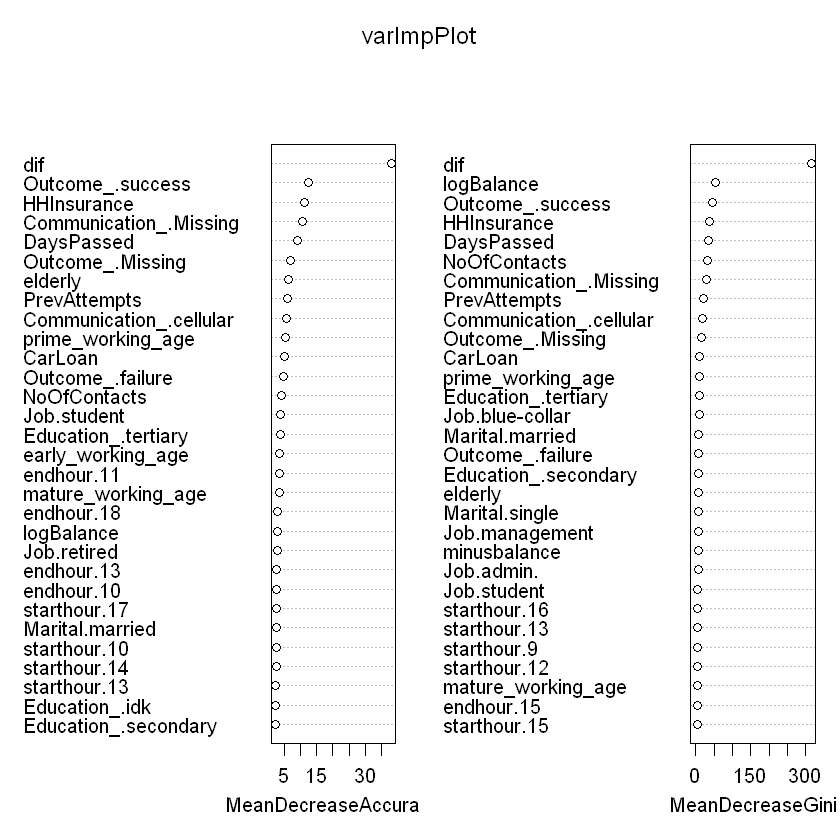

In [123]:
varImpPlot(cidata_rf_fit, main="varImpPlot")